<a href="https://colab.research.google.com/github/alandavidgrunberg/example_notebooks/blob/master/matplotlib_and_seaborn/knn_classification__iris_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

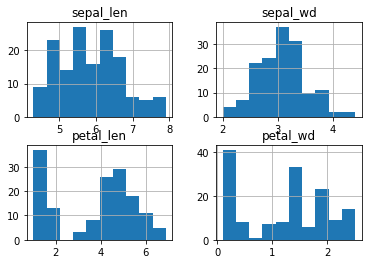

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# iris dataset stored as .csv file at sololearn.com
# reading from .csv and loading as pandas DataFrame

iris = pd.read_csv('https://sololearn.com/uploads/files/iris.csv')

# dropping redundant 'id' column

iris.drop('id', axis=1, inplace=True)

# univariate plots (plots of each individual variable)
# shows that sepal_len and sepal_wd have normal (Gaussian) distribution, 
# shows that petal_len has two modes, one peak around 0 and the other around 5
# less patterns shown for petal_wd

iris.hist()
plt.show()

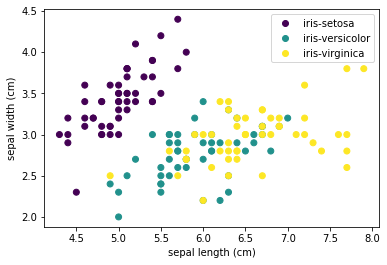

In [4]:

# building color coded scatter plots to see interactions between variables for different species

# build a dictionary (key:value pairs) mapping each species to an integer 
inv_name_dict = {'iris-setosa': 0, 
  'iris-versicolor': 1,
  'iris-virginica': 2}

# build integer color code for all the items in the DataFrame
colors = [inv_name_dict[item] for item in iris['species']] #returns a list of 150 integers: fifty 0s, fifty 1s, fifty 2s

# scatter plot, sepal_len vs sepal_wd
scatter = plt.scatter(iris['sepal_len'], iris['sepal_wd'], c = colors) # 'c=' is marker color, passing 'colors' list
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend(handles=scatter.legend_elements()[0], # 'handle=' is the objects used to generate an entry in the legend, passing 'scatter.legend_elements()[0]'
           # 'scatter.legend_elements()' is a tuple listing the legend elements of the scatter plot 
           # '[0]' picks the first item in the tuple, which is a list of the 3 objects ('.artists') that draw the markers for the 3 species
  labels = inv_name_dict.keys()) # 'labels=' is the names to be used for the labels, passing 'inv_name_dict.keys()' list of keys from that dictionary
plt.show()
# from the plot we see that iris-setosa can be distinguised from the others


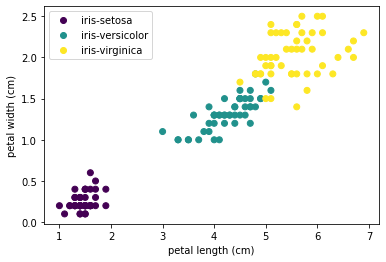

In [6]:
# scatter plot, petal_len vs petal_wd
scatter = plt.scatter(iris['petal_len'], iris['petal_wd'],c = colors)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(handles= scatter.legend_elements()[0],
  labels = inv_name_dict.keys())
plt.show()
# from the plot we see that petal length and width are highly correlated, and all 3 features can be distinguished 


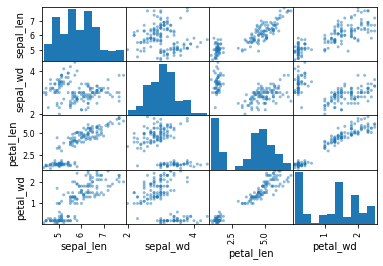

In [7]:
# 'pd.plotting.scatter_matrix() outputs scatter plots of all pairs of features, with histograms of individual features along the diagonal
pd.plotting.scatter_matrix(iris)
plt.show()


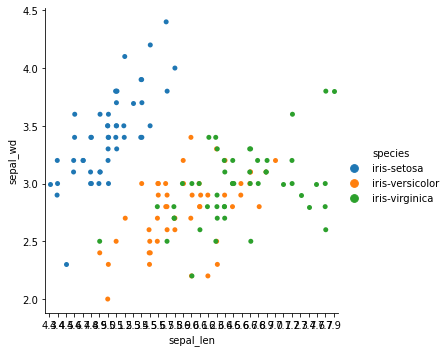

In [9]:
# doing the same thing as above more simply with the seaborn library
import seaborn as sns

sns.catplot(x="sepal_len", y="sepal_wd", hue="species", data=iris) # issue: x-axis ticks showing up overlapping


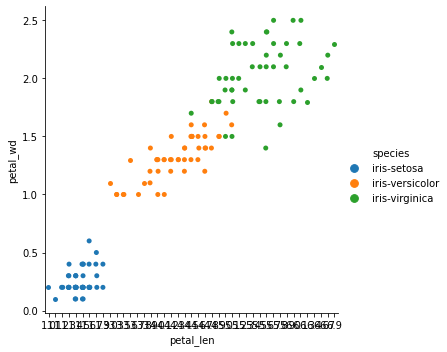

In [10]:
sns.catplot(x="petal_len", y="petal_wd", hue="species", data=iris) # issue: x-axis ticks showing up overlapping


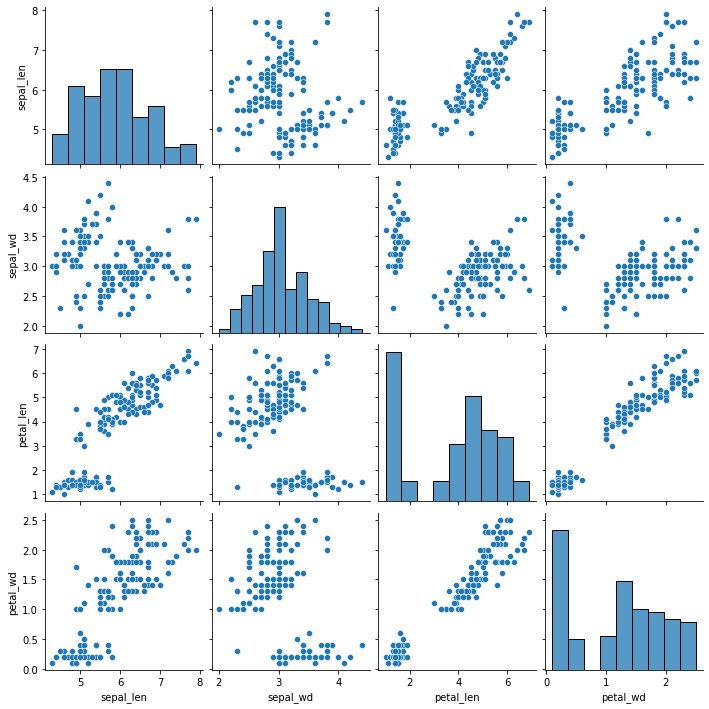

In [11]:
sns.pairplot(iris)
plt.show()

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


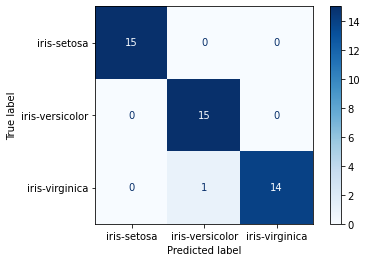

In [12]:

### classification modelling 

## feature selection
# petal_len and petal_wd selected because the scatter plots/scatter matrix showed are most useful to seperate the species
X = iris[['petal_len', 'petal_wd']]
y = iris['species']

## train test split
# 70% training data, 30% testing data
# 'stratify=' ensures distribution of species types remains similar in training and testing sets by passing 'y'
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=33, stratify=y)

## import model
from sklearn.neighbors import KNeighborsClassifier

## instantiate 
knn = KNeighborsClassifier(n_neighbors=5) #telling the model to check the 5 nearest neighbors

## fit
knn.fit(X_train, y_train)

## predict
pred = knn.predict(X_test)

## model evaluation

# confusion matrix 
# summary of the counts of correct and incorrect predictions, broken down by each class
from sklearn.metrics import confusion_matrix 
print(confusion_matrix(y_test, pred)) 

# plot the confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues); # 'cmap=' to use a specific colormap

# code and comments by github.com/alandavidgrunberg
